In [19]:
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import ast
%matplotlib inline

In [8]:
main_path = 'global-wheat-detection/'
# data = {}
# for folder in os.listdir(main_path):
#     if os.path.isdir(main_path+folder):
#         for image_path in glob(main_path+folder+'/*.jpg'):
#             img = cv2.imread(image_path)
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
# Tidak perlu disave karena jumlah gambarnya banyak

In [20]:
data = pd.read_csv(main_path+'/train.csv')
data['bbox'] = data['bbox'].apply(ast.literal_eval)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147793 entries, 0 to 147792
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  147793 non-null  object
 1   width     147793 non-null  int64 
 2   height    147793 non-null  int64 
 3   bbox      147793 non-null  object
 4   source    147793 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.6+ MB


In [25]:
image_id = data.image_id[0]
bboxes = data[data.image_id==image_id].bbox.to_list()
img = cv2.imread(main_path+f'train/{image_id}.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

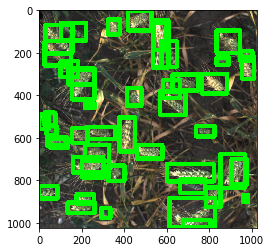

In [32]:
img_copy = img.copy()
wheats = []
for (x,y,w,h) in bboxes:
    cv2.rectangle(img_copy, (int(x),int(y)), (int(x+w),int(y+h)), (0, 250, 0), 20)
    wheats.append(img[int(y):int(y+h), int(x):int(x+w)])
plt.imshow(img_copy)

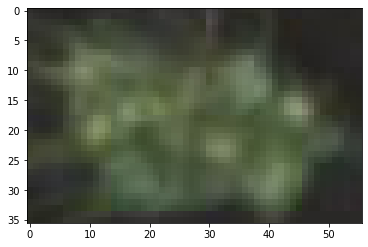

In [33]:
plt.imshow(wheats[0])

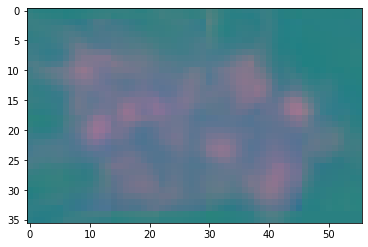

In [34]:
wheat0_lab = cv2.cvtColor(wheats[0], cv2.COLOR_RGB2LAB)
plt.imshow(wheat0_lab)

In [36]:
def show_LAB_distribution(img):
    split_lab = cv2.split(lab)

    histSize = 256
    histRange = (0, 256) # the upper boundary is exclusive
    accumulate = False

    histr1 = cv2.calcHist(split_lab, [0], None, [histSize], histRange, accumulate=accumulate)
    histr2 = cv2.calcHist(split_lab, [1], None, [histSize], histRange, accumulate=accumulate)
    histr3 = cv2.calcHist(split_lab, [2], None, [histSize], histRange, accumulate=accumulate)
    fig, ax = plt.subplots()
    ax.plot(histr1, color='cyan', label='L')
    ax.plot(histr2, color='red', label='*a')
    ax.plot(histr3, color='blue', label='*b')
    ax.legend()
    plt.show()

In [ ]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
lower_red = np.array([100, 50, 50])
upper_red = np.array([255, 255, 180])
mask = cv2.inRange(hsv_img, lower_red, upper_red)
red_contour, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)